In [31]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
cd /content/drive/My Drive/payaletter

/content/drive/My Drive/payaletter


In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import os
df = pd.read_excel("Automation Receiver User Recommander.xlsx")

In [34]:
df.head()

,Sender,Class,IsCopy,NodeType,LevelNo,IsPrivate,Time,SenderWorkgroup,SenderPost,WaitTime1,WaitTime2,HasAttachment,OwnerUser,OwnerWorkgroup,IsOwner,HasBody,IsCopied,HasCustomDisplayName,IsTask,IsSent,ReceiverUser
0,100,frmTelAnounce,0,ForNotification,3,0,16,sales,2.0,42.0,51,0,100,148,0,0,0,0,0,0,100
1,101,Internal,0,ForNotification,2,0,15,sales,2.0,1.0,1,1,vahid,sales,1,0,0,1,0,0,101
2,101,Sadereh,0,ForNotification,2,0,10,sales,2.0,1.0,1,1,vahid,sales,1,0,0,1,0,0,101
3,101,Sadereh,0,ForNotification,2,0,15,sales,2.0,2.0,2,0,vahid,sales,1,0,0,1,0,0,101
4,101,Sadereh,0,ForNotification,3,0,14,sales,2.0,12.0,88,0,101,sales,0,0,0,1,0,0,101


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59014 entries, 0 to 59013
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sender                59014 non-null  object 
 1   Class                 59014 non-null  object 
 2   IsCopy                59014 non-null  int64  
 3   NodeType              58950 non-null  object 
 4   LevelNo               59014 non-null  int64  
 5   IsPrivate             59014 non-null  int64  
 6   Time                  59014 non-null  int64  
 7   SenderWorkgroup       56503 non-null  object 
 8   SenderPost            51621 non-null  float64
 9   WaitTime1             58971 non-null  float64
 10  WaitTime2             59014 non-null  int64  
 11  HasAttachment         59014 non-null  int64  
 12  OwnerUser             59014 non-null  object 
 13  OwnerWorkgroup        59014 non-null  object 
 14  IsOwner               59014 non-null  int64  
 15  HasBody            

In [36]:
df.isnull().values.any()

True

In [37]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['Sender']= label_encoder.fit_transform(df['Sender'].astype(str))
df['Class']= label_encoder.fit_transform(df['Class'])
df['NodeType']= label_encoder.fit_transform(df['NodeType'].astype(str))
df['OwnerWorkgroup']= label_encoder.fit_transform(df['OwnerWorkgroup'].astype(str))
df['OwnerUser']= label_encoder.fit_transform(df['OwnerUser'].astype(str))
df['ReceiverUser']= label_encoder.fit_transform(df['ReceiverUser'].astype(str))
df['SenderWorkgroup']= label_encoder.fit_transform(df['SenderWorkgroup'].astype(str))

print(df.head())

   Sender  Class  IsCopy  ...  IsTask  IsSent  ReceiverUser
0       1     21       0  ...       0       0             1
1       2      3       0  ...       0       0             2
2       2      6       0  ...       0       0             2
3       2      6       0  ...       0       0             2
4       2      6       0  ...       0       0             2

[5 rows x 21 columns]


In [38]:
df.ReceiverUser

0          1
1          2
2          2
3          2
4          2
        ... 
59009    145
59010    145
59011    145
59012    145
59013    145
Name: ReceiverUser, Length: 59014, dtype: int64

In [39]:
df.describe()

,Sender,Class,IsCopy,NodeType,LevelNo,IsPrivate,Time,SenderWorkgroup,SenderPost,WaitTime1,WaitTime2,HasAttachment,OwnerUser,OwnerWorkgroup,IsOwner,HasBody,IsCopied,HasCustomDisplayName,IsTask,IsSent,ReceiverUser
count,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,51621.000000,5.897100e+04,5.901400e+04,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000,59014.000000
mean,90.921493,9.481733,0.003474,1.581540,3.116074,0.000695,12.409496,11.444539,10.111466,1.648564e+04,2.313826e+04,0.262650,74.167926,11.573627,0.462958,0.146304,0.076745,0.898075,0.428322,0.017606,90.921493
std,30.664314,6.130313,0.058837,0.548978,1.818846,0.026349,2.803502,2.364624,6.205497,8.558628e+04,9.788179e+04,0.440077,27.541910,2.550988,0.498630,0.353414,0.266188,0.302552,0.494840,0.131515,30.664314
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,0.000000,1.000000,-6.500000e+01,-6.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,6.000000,0.000000,1.000000,2.000000,0.000000,10.000000,10.000000,4.000000,3.000000e+00,4.000000e+00,0.000000,46.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,58.000000
50%,83.000000,9.000000,0.000000,2.000000,3.000000,0.000000,12.000000,13.000000,12.000000,5.100000e+01,1.110000e+02,0.000000,66.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,83.000000
75%,119.000000,9.000000,0.000000,2.000000,3.000000,0.000000,15.000000,13.000000,13.000000,2.527000e+03,5.869000e+03,1.000000,97.000000,13.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,119.000000
max,145.000000,32.000000,1.000000,6.000000,28.000000,1.000000,22.000000,17.000000,111.000000,3.252606e+06,3.252606e+06,1.000000,123.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,145.000000


In [40]:
df.mod(df, axis='columns', level=None, fill_value=None)

,Sender,Class,IsCopy,NodeType,LevelNo,IsPrivate,Time,SenderWorkgroup,SenderPost,WaitTime1,WaitTime2,HasAttachment,OwnerUser,OwnerWorkgroup,IsOwner,HasBody,IsCopied,HasCustomDisplayName,IsTask,IsSent,ReceiverUser
0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
3,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
4,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59009,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
59010,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
59011,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0
59012,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0


In [41]:
#df.dropna()

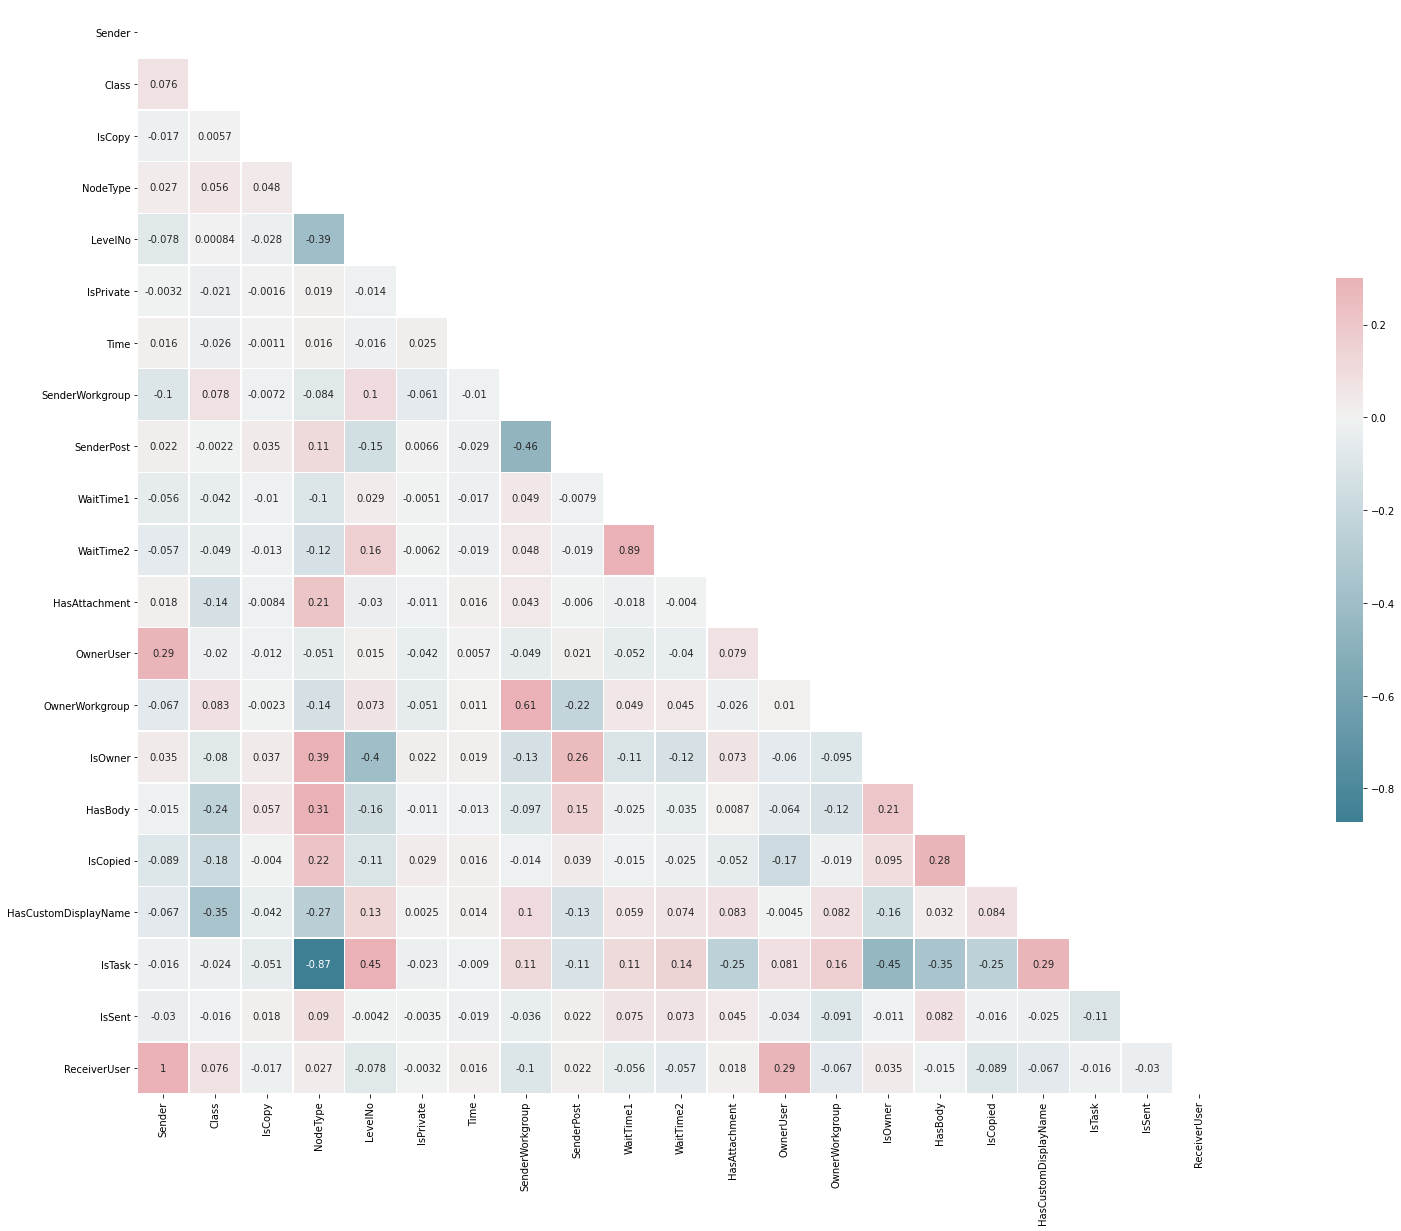

In [42]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [43]:
df=df.drop(columns=['WaitTime2','IsCopy'])

In [44]:
df.head(100)

,Sender,Class,NodeType,LevelNo,IsPrivate,Time,SenderWorkgroup,SenderPost,WaitTime1,HasAttachment,OwnerUser,OwnerWorkgroup,IsOwner,HasBody,IsCopied,HasCustomDisplayName,IsTask,IsSent,ReceiverUser
0,1,21,2,3,0,16,12,2.0,42.0,0,0,1,0,0,0,0,0,0,1
1,2,3,2,2,0,15,12,2.0,1.0,1,117,12,1,0,0,1,0,0,2
2,2,6,2,2,0,10,12,2.0,1.0,1,117,12,1,0,0,1,0,0,2
3,2,6,2,2,0,15,12,2.0,2.0,0,117,12,1,0,0,1,0,0,2
4,2,6,2,3,0,14,12,2.0,12.0,0,1,12,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,3,2,2,0,15,12,17.0,40.0,1,66,12,1,0,0,1,0,0,9
96,10,3,2,2,0,11,10,11.0,3.0,1,100,11,1,1,0,1,0,0,10
97,11,3,2,2,0,9,9,22.0,2.0,0,94,9,1,1,1,1,0,0,11
98,11,6,2,2,0,13,4,16.0,4.0,0,117,4,1,1,0,1,0,0,11


In [45]:
len(df.ReceiverUser.unique())

146

In [46]:
df.ReceiverUser.unique()

array([  1,   2,   4,   6,   8,  10,  11,  13,  15,  17,  18,  20,  21,
        22,  23,  25,  26,  27,  29,  30,   0,   3,   7,   9,  12,  24,
        14,  16,  19,  28,  31,  33,  37,  38,  39,  32,  34,  35,  40,
        45,   5,  36,  46,  47,  48,  41,  42,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  43,  63,  64,  65,
        44,  66,  67,  68,  69,  70,  71,  74,  75,  77,  78,  72,  73,
        76,  79,  80,  82,  81,  83,  84,  85,  87,  88,  86,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 103, 104, 105,
       106, 107, 108, 110, 100, 111, 109, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 126, 127, 129, 131, 132, 133,
       134, 135, 136, 137, 138, 102, 125, 128, 139, 140, 141, 142, 143,
       144, 145, 130])

In [47]:
len(np.where(df.ReceiverUser==2))

1

In [48]:
np.where(df.ReceiverUser==2)

(array([  1,   2,   3,   4,   5,   6,   7,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  83,  84,  85,  86, 124, 125, 126, 127, 128,
        129, 166, 167, 168, 169, 170, 207, 251, 252, 253, 254, 255, 256,
        257, 258, 289, 290, 291, 292, 293, 294, 295, 296]),)

In [49]:
df.ReceiverUser.unique()

array([  1,   2,   4,   6,   8,  10,  11,  13,  15,  17,  18,  20,  21,
        22,  23,  25,  26,  27,  29,  30,   0,   3,   7,   9,  12,  24,
        14,  16,  19,  28,  31,  33,  37,  38,  39,  32,  34,  35,  40,
        45,   5,  36,  46,  47,  48,  41,  42,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  43,  63,  64,  65,
        44,  66,  67,  68,  69,  70,  71,  74,  75,  77,  78,  72,  73,
        76,  79,  80,  82,  81,  83,  84,  85,  87,  88,  86,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 103, 104, 105,
       106, 107, 108, 110, 100, 111, 109, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 126, 127, 129, 131, 132, 133,
       134, 135, 136, 137, 138, 102, 125, 128, 139, 140, 141, 142, 143,
       144, 145, 130])

In [50]:
df['ReceiverUser'].value_counts()

58     10869
121     5715
82      4521
138     3373
83      3209
       ...  
76         2
122        2
73         1
102        1
81         1
Name: ReceiverUser, Length: 146, dtype: int64

# **drop classes with count<10**

In [51]:
a=np.where(df['ReceiverUser'].value_counts()<10)

In [52]:
type(a)

tuple

In [53]:
a[0]

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145])

In [54]:
len(a[0])

46

In [55]:
df=df.drop(a[0])

In [56]:
len(df)

58968

In [57]:
df.fillna(df.mean(), inplace=True)

# **seperate labels and features**

In [58]:
X=df.iloc[:,0:18].values
Y=df.iloc[:,18].values

In [59]:
#X.head()
Y[0:5]

array([1, 2, 2, 2, 2])

In [60]:
#Y.head()

In [61]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [62]:
#x_train.dropna

# **NAIVE BAYES CLASSIFIER**

In [63]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [64]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, y_pred) )
#print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, y_pred))

Accuracy: 0.6462488129154795


# **TREE_GRID ALGORITHM**

In [65]:
#X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state=17)
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=17)

tree_params = {'max_depth': range(1,5), 'max_features': range(3,15), 'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=10)
tree_grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [66]:
#Best Parameters
tree_grid.best_params_, tree_grid.best_score_

({'criterion': 'entropy', 'max_depth': 4, 'max_features': 14},
 0.7238731373449486)

In [67]:
y_pred=tree_grid.predict(x_test)

In [68]:
y_pred[0:50]

array([119,  54, 142,  58,  58,  58,  58, 124,  83, 121, 138,  54, 113,
       138,  54,  83,  54,  82, 138, 138,  78, 111,  58, 138, 138,  54,
       142,  82,  67,  82,  82,  58,  54,  78, 121, 124,  58,  88, 142,
       119,  58, 121,  67,  58,  58, 142,  58,  48,  54, 121])

In [69]:
y_test[0:50]

array([119,  10, 145,  58,  58,  58,  58, 126,  82, 121, 138,  54, 113,
       138,  54,  82,  48,  82, 138, 138,  75, 111,  58, 131, 138,  55,
       140,  82,  68,  82,  82,  58,  54,  75, 121, 126,  58,  99, 142,
       118,  58, 121,  67,  58,  58, 142,  58,  48,  51, 121])

In [70]:
from sklearn import metrics
#>>> y_pred = [0, 1, 0, 0]
#>>> y_true = [0, 1, 0, 1]
metrics.precision_score(y_test, y_pred,average='micro')

metrics.recall_score(y_test, y_pred,average='micro')

metrics.f1_score(y_test, y_pred,average='micro')

#metrics.fbeta_score(y_test, y_pred, beta=0.5,average='micro')

#metrics.fbeta_score(y_test, y_pred, beta=1,average='micro')

#metrics.fbeta_score(y_test, y_pred, beta=2,average='micro')

#metrics.precision_recall_fscore_support(y_test, y_pred, beta=0.5,average='micro')

0.7317188983855651

In [71]:
#y_pred = lr.predict_proba(X_test)[:, 1] > .85

In [72]:
metrics.fbeta_score(y_test, y_pred, beta=0.5,average='micro')

0.731718898385565

In [73]:
metrics.precision_recall_fscore_support(y_test, y_pred, beta=0.5,average='micro')

(0.731718898385565, 0.731718898385565, 0.731718898385565, None)

In [74]:
precision_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.619345415261292

In [75]:
precision_score(y_test, y_pred, average='micro')

0.731718898385565

In [76]:
y_pred

array([119,  54, 142, ..., 113, 111, 142])

In [77]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [78]:
'''from sklearn.ensemble import RandomForestClassifier

#Stratified split for the validation process
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

#initialize the set of parameters for exhaustive search and fit to find out the optimal parameters
rfc_params = {'max_features': range(1,11), 'min_samples_leaf': range(1,3), 'max_depth': range(3,13), 'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs= -1)

gcv = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=skf)
gcv.fit(x_train, y_train)'''

"from sklearn.ensemble import RandomForestClassifier\n\n#Stratified split for the validation process\nskf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)\n\n#initialize the set of parameters for exhaustive search and fit to find out the optimal parameters\nrfc_params = {'max_features': range(1,11), 'min_samples_leaf': range(1,3), 'max_depth': range(3,13), 'criterion':['gini','entropy']}\n\nrfc = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs= -1)\n\ngcv = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=skf)\ngcv.fit(x_train, y_train)"

In [79]:
#Best Parameters
#gcv.best_params_, gcv.best_score_

# **logistic regression algorithm**

In [80]:
'''# Building and training the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(x_test)'''

'# Building and training the model\nfrom sklearn.linear_model import LogisticRegression\nclassifier = LogisticRegression()\nclassifier.fit(x_train, y_train)\n \n# Predicting the Test set results\ny_pred = classifier.predict(x_test)'

In [81]:
'''from sklearn.metrics import accuracy_score
#confidence = classifier.score(y_test, y_pred)
print('accuracuy on test data:',confidence)
accuracy_score(y_test, y_pred, normalize=False)'''

"from sklearn.metrics import accuracy_score\n#confidence = classifier.score(y_test, y_pred)\nprint('accuracuy on test data:',confidence)\naccuracy_score(y_test, y_pred, normalize=False)"

# **SVM Algorithm**

In [82]:
'''from sklearn import svm


# Building and training the model


from sklearn.linear_model import LogisticRegression

classifier =svm.SVC(gamma=0.001, C=100)
classifier.fit(x_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(x_test)
confidence = classifier.score(x_test, y_test)
print('accuracuy on test data:',confidence)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)'''

"from sklearn import svm\n\n\n# Building and training the model\n\n\nfrom sklearn.linear_model import LogisticRegression\n\nclassifier =svm.SVC(gamma=0.001, C=100)\nclassifier.fit(x_train, y_train)\n \n# Predicting the Test set results\ny_pred = classifier.predict(x_test)\nconfidence = classifier.score(x_test, y_test)\nprint('accuracuy on test data:',confidence)\n# Making the Confusion Matrix\nfrom sklearn.metrics import confusion_matrix\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)"

# **KNN Algorithm**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(x_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(x_test)
confidence = classifier.score(x_test, y_test)
print('accuracuy on test data:',confidence)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

accuracuy on test data: 0.6363451363451363


In [84]:
import numpy as np
from sklearn.decomposition import PCA

In [85]:
'''pca = PCA(n_components=2)
x_train=pca.fit(x_train)'''


'pca = PCA(n_components=2)\nx_train=pca.fit(x_train)'

In [86]:
type(x_train)

numpy.ndarray

In [87]:
'''from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(x_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(x_test)
confidence = classifier.score(x_test, y_test)
print('accuracuy on test data:',confidence)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#print(cm)'''

"from sklearn.neighbors import KNeighborsClassifier\nclassifier = KNeighborsClassifier(n_neighbors=5)\n\nclassifier.fit(x_train, y_train)\n \n# Predicting the Test set results\ny_pred = classifier.predict(x_test)\nconfidence = classifier.score(x_test, y_test)\nprint('accuracuy on test data:',confidence)\n# Making the Confusion Matrix\nfrom sklearn.metrics import confusion_matrix\n#cm = confusion_matrix(y_test, y_pred)\n#print(cm)"

In [88]:
# you can make this a lot easier using Pipeline

'''from sklearn.pipeline import Pipeline

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA()),
                 ('tree',  KNeighborsClassifier(n_neighbors=5))])

pipe.fit(x_train, y_train)

pipe.predict(x_test)'''

"from sklearn.pipeline import Pipeline\n\n# fits PCA, transforms data and fits the decision tree classifier\n# on the transformed data\npipe = Pipeline([('pca', PCA()),\n                 ('tree',  KNeighborsClassifier(n_neighbors=5))])\n\npipe.fit(x_train, y_train)\n\npipe.predict(x_test)"

# **decision tree with pca**

In [89]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets import load_iris

# load data
#iris = load_iris()

# initiate PCA and classifier
pca = PCA(15)
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features= 14)

# transform / fit

X_transformed = pca.fit_transform(x_train)
classifier.fit(X_transformed,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
X_test_transformed = pca.fit_transform(x_test)

In [91]:
classifier.score(X_test_transformed,y_test)

0.009700176366843033

In [92]:
classifier.predict(X_test_transformed)

array([ 83, 121,  83, ...,  82,  83,  54])

In [93]:
x_test1=x_test[0]

In [94]:
x_test1=x_test1[0:15]

In [95]:
#X_test1_transformed = pca.fit_transform(x_test1.reshape(1,-1))

In [96]:
classifier.predict(x_test1.reshape(1,-1))

array([111])

In [97]:
'''from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=17)

tree_params = {'max_depth': range(1,5), 'max_features': range(3,15), 'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=10)
tree_grid.fit(X_transformed, y_train)'''

"from sklearn.model_selection import GridSearchCV\n\ntree = DecisionTreeClassifier(random_state=17)\n\ntree_params = {'max_depth': range(1,5), 'max_features': range(3,15), 'criterion': ['gini','entropy']}\n\ntree_grid = GridSearchCV(tree, tree_params, cv=10)\ntree_grid.fit(X_transformed, y_train)"

# **xgboost model**

In [98]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
'''from sklearn.neighbors import KNeighborsClassifier
classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
     max_depth=4, random_state=0)
#>>> clf.score(X_test, y_test)

classifier.fit(x_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(x_test)
confidence = classifier.score(x_test, y_test)
print('accuracuy on test data:',confidence)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#print(cm)'''

"from sklearn.neighbors import KNeighborsClassifier\nclassifier = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,\n     max_depth=4, random_state=0)\n#>>> clf.score(X_test, y_test)\n\nclassifier.fit(x_train, y_train)\n \n# Predicting the Test set results\ny_pred = classifier.predict(x_test)\nconfidence = classifier.score(x_test, y_test)\nprint('accuracuy on test data:',confidence)\n# Making the Confusion Matrix\nfrom sklearn.metrics import confusion_matrix\n#cm = confusion_matrix(y_test, y_pred)\n#print(cm)"

In [100]:
'''from sklearn.neural_network import MLPClassifier
Clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15,), random_state=1)

Clf.fit(x_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')'''

"from sklearn.neural_network import MLPClassifier\nClf = MLPClassifier(solver='lbfgs', alpha=1e-5,\n                   hidden_layer_sizes=(15,), random_state=1)\n\nClf.fit(x_train, y_train)\nMLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,\n              solver='lbfgs')"

In [101]:
'''Clf.score(x_test,y_test)'''

'Clf.score(x_test,y_test)'

# **classification with deeplearning**

In [102]:
x_train.shape

(44226, 18)

In [103]:
y_train.shape

(44226,)

In [104]:
#y_train.reshape(1,-1)

In [105]:
#y_train.shape

In [106]:
#x_train.reshape(44260,18,1)

In [107]:
#num_labels = len(np.unique(y_train))

In [108]:
'''#converter em one-hot
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, dtype='int')
y_test = to_categorical(y_test, dtype='int')'''

"#converter em one-hot\nfrom tensorflow.keras.utils import to_categorical\ny_train = to_categorical(y_train, dtype='int')\ny_test = to_categorical(y_test, dtype='int')"

In [109]:
y_train

array([ 48, 138,  58, ...,  58,  83,  58])

In [110]:
# use mlp for prediction on multi-label classification
from numpy import asarray
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Activation, Flatten,Dropout
import tensorflow as tf
# get the dataset
'''def get_dataset():
	X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
	return X, y'''
 
# get the model
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(100, input_dim = n_inputs, activation = 'relu'))
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(156, activation = 'relu'))
  #model.add(Dropout(0.2))
  #model.add(Dense(256, activation = 'relu'))
  model.add(Flatten())
  model.add(Dense(n_outputs, activation = 'sigmoid'))
  return model
	
    
 
'''# load dataset
X, y = get_dataset()
n_inputs, n_outputs = X.shape[1], y.shape[1]'''
# get model
model = get_model(18,146 )
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile( loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
# fit the model on all data
model.fit(x_train, y_train, verbose=2, epochs=150, batch_size=128)
# make a prediction for new data
#row = [3, 3, 6, 7, 8, 2, 11, 11, 1, 3]
#newX = asarray([row])
#yhat = model.predict(newX)
#print('Predicted: %s' % yhat[0])

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


346/346 - 13s - loss: 92.7180 - accuracy: 0.2432
Epoch 2/150
346/346 - 1s - loss: 3.3488 - accuracy: 0.3408
Epoch 3/150
346/346 - 1s - loss: 2.9851 - accuracy: 0.3724
Epoch 4/150
346/346 - 1s - loss: 2.6548 - accuracy: 0.3959
Epoch 5/150
346/346 - 1s - loss: 2.4764 - accuracy: 0.4125
Epoch 6/150
346/346 - 1s - loss: 2.3500 - accuracy: 0.4237
Epoch 7/150
346/346 - 1s - loss: 2.2234 - accuracy: 0.4399
Epoch 8/150
346/346 - 1s - loss: 2.1686 - accuracy: 0.4475
Epoch 9/150
346/346 - 1s - loss: 2.0888 - accuracy: 0.4598
Epoch 10/150
346/346 - 1s - loss: 2.0221 - accuracy: 0.4714
Epoch 11/150
346/346 - 1s - loss: 2.1907 - accuracy: 0.4644
Epoch 12/150
346/346 - 1s - loss: 2.0538 - accuracy: 0.4719
Epoch 13/150
346/346 - 1s - loss: 1.9740 - accuracy: 0.4810
Epoch 14/150
346/346 - 1s - loss: 1.9150 - accuracy: 0.4912
Epoch 15/150
346/346 - 1s - loss: 1.8776 - accuracy: 0.4999
Epoch 16/150
346/346 - 1s - loss: 1.8852 - accuracy: 0.4984
Epoch 17/150
346/346 - 1s - loss: 1.9175 - accuracy: 0.5032

In [111]:
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=128,
                        verbose=2)
print("nAccuracy: %.1f%%n" % (100.0 * acc))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


116/116 - 1s - loss: 0.9007 - accuracy: 0.7543
nAccuracy: 75.4%n


In [112]:
x_test

array([[119.,   9.,   1., ...,   1.,   1.,   0.],
       [ 10.,   3.,   2., ...,   1.,   0.,   0.],
       [145.,   9.,   1., ...,   1.,   1.,   0.],
       ...,
       [113.,   4.,   2., ...,   1.,   0.,   0.],
       [111.,   9.,   1., ...,   1.,   1.,   0.],
       [142.,   9.,   1., ...,   1.,   1.,   0.]])

In [113]:
y_test

array([119,  10, 145, ..., 113, 111, 142])

In [114]:
model.predict(x_test)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.6770685e-22,
        1.2016636e-25, 3.5966262e-20],
       [3.8235357e-01, 7.0866799e-01, 7.0479351e-01, ..., 7.6284642e-31,
        4.2023823e-19, 1.2552402e-27],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0993831e-08,
        7.6112617e-22, 1.5751414e-09],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.4374471e-26,
        7.4478098e-21, 4.4385464e-13],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.8698646e-01,
        2.8556108e-01, 9.9798965e-01]], dtype=float32)

In [115]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [116]:
predictions = probability_model.predict(x_test)

In [117]:
predictions[0].max()

0.018169206

In [118]:
np.argmax(predictions[0])

119

In [119]:
y_test[0]

119

In [120]:
np.argmax(predictions[5])

58

In [121]:
y_test[5]

58

# ***prediction for one data***

In [122]:
predictions = probability_model.predict(x_test[10].reshape(1,-1))

In [123]:
np.argmax(predictions)

138

In [124]:
y_test[10]

138

In [125]:
type(predictions)

numpy.ndarray

In [126]:
np.sort(predictions)

array([[0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00586041, 0.00586041,
        0.00586041, 0.00586041, 0.00586041, 0.00